# Making the XGBoost Overfit to Compare Results of What a Generalized vs Non-Gen Model Look Like

In [17]:
#imports
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

## Data Loading and Train-Test-Split

In [18]:
from sklearn.model_selection import train_test_split
#load the data
#Load preprocessed the data
df = pd.read_csv("traffic_data_preprocessed.csv")
df.head()

#Creating a training and a testing split
X = df.drop(columns=["traffic_volume"]).values
y = df["traffic_volume"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Generalized XGB

In [19]:
#from grid search best parameters were {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 8, 'reg_alpha': 1, 'reg_lambda': 10}

xgb_normal = XGBRegressor( booster = 'gbtree',
                    objective='reg:squarederror',
                    eval_metric='rmse',
                    gamma = 0,
                    learning_rate = 0.3,
                    max_depth = 8, 
                    reg_alpha = 1, 
                    reg_lambda = 10,
                    random_state = 42
                    )

xgb_normal.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:0.72989	validation_1-rmse:0.73288
[1]	validation_0-rmse:0.54832	validation_1-rmse:0.55030
[2]	validation_0-rmse:0.42841	validation_1-rmse:0.42963
[3]	validation_0-rmse:0.35050	validation_1-rmse:0.35095
[4]	validation_0-rmse:0.30132	validation_1-rmse:0.30234
[5]	validation_0-rmse:0.26933	validation_1-rmse:0.27168
[6]	validation_0-rmse:0.25036	validation_1-rmse:0.25412
[7]	validation_0-rmse:0.23484	validation_1-rmse:0.23987
[8]	validation_0-rmse:0.22452	validation_1-rmse:0.23111
[9]	validation_0-rmse:0.21174	validation_1-rmse:0.22039
[10]	validation_0-rmse:0.20481	validation_1-rmse:0.21470
[11]	validation_0-rmse:0.19967	validation_1-rmse:0.21178
[12]	validation_0-rmse:0.19560	validation_1-rmse:0.20963
[13]	validation_0-rmse:0.18978	validation_1-rmse:0.20483
[14]	validation_0-rmse:0.18521	validation_1-rmse:0.20183
[15]	validation_0-rmse:0.18239	validation_1-rmse:0.19953
[16]	validation_0-rmse:0.17868	validation_1-rmse:0.19655
[17]	validation_0-rmse:0.17579	validation

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Overfitting XGB

In [25]:

xgb_overfit = XGBRegressor( booster = 'gbtree',
                    objective='reg:squarederror',
                    eval_metric='rmse',
                    gamma = 0,
                    learning_rate = 0.3,
                    max_depth = 100, 
                    reg_alpha = 1, 
                    reg_lambda = 0,
                    random_state = 42
                    )

xgb_overfit.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:0.71678	validation_1-rmse:0.72370
[1]	validation_0-rmse:0.52201	validation_1-rmse:0.53409
[2]	validation_0-rmse:0.38813	validation_1-rmse:0.40762
[3]	validation_0-rmse:0.29669	validation_1-rmse:0.32647
[4]	validation_0-rmse:0.23484	validation_1-rmse:0.27638
[5]	validation_0-rmse:0.19180	validation_1-rmse:0.24162
[6]	validation_0-rmse:0.16494	validation_1-rmse:0.22429
[7]	validation_0-rmse:0.14475	validation_1-rmse:0.21281
[8]	validation_0-rmse:0.12920	validation_1-rmse:0.20384
[9]	validation_0-rmse:0.11749	validation_1-rmse:0.19825
[10]	validation_0-rmse:0.10865	validation_1-rmse:0.19467
[11]	validation_0-rmse:0.10177	validation_1-rmse:0.19217
[12]	validation_0-rmse:0.09590	validation_1-rmse:0.19055
[13]	validation_0-rmse:0.09047	validation_1-rmse:0.18792
[14]	validation_0-rmse:0.08645	validation_1-rmse:0.18706
[15]	validation_0-rmse:0.08272	validation_1-rmse:0.18639
[16]	validation_0-rmse:0.07924	validation_1-rmse:0.18491
[17]	validation_0-rmse:0.07642	validation

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=100,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
from sklearn.metrics import mean_squared_error

norm_train_pred = xgb_normal.predict(X_train)
norm_test_pred = xgb_normal.predict(X_test)
training_mse_normal = mean_squared_error(y_train, norm_train_pred)
testing_mse_normal = mean_squared_error(y_test, norm_test_pred)

overfit_train_pred = xgb_overfit.predict(X_train)
overfit_test_pred = xgb_overfit.predict(X_test)
training_mse_overfit = mean_squared_error(y_train, overfit_train_pred)
testing_mse_overfit = mean_squared_error(y_test, overfit_test_pred)

print(f"Generalized XGB training and test mse of, {training_mse_normal} and {testing_mse_normal}")
print(f"Overfit XGB training and test mse of, {training_mse_overfit} and {testing_mse_overfit}")


Generalized XGB training and test mse of, 0.009164297432512961 and 0.02492011737493
Overfit XGB training and test mse of, 0.0011085392357276529 and 0.02996613922437538


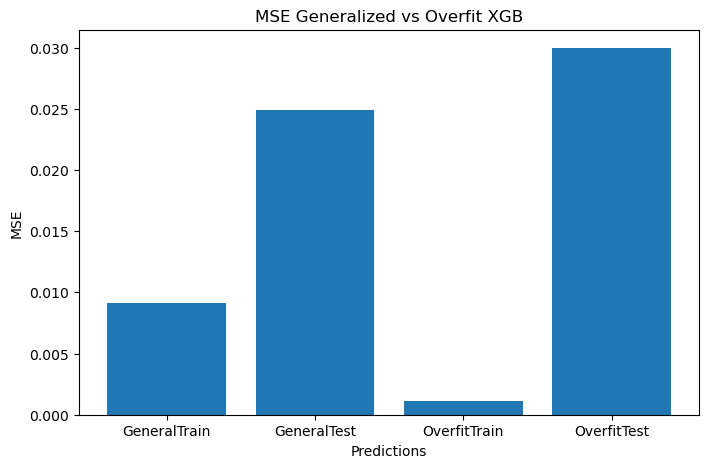

In [34]:
import matplotlib.pyplot as plt

labels = ['GeneralTrain', 'GeneralTest', 'OverfitTrain', 'OverfitTest']
mses = [training_mse_normal, testing_mse_normal, training_mse_overfit, testing_mse_overfit]

plt.figure(figsize=(8, 5))
plt.bar(labels, mses)
plt.title('MSE Generalized vs Overfit XGB')
plt.xlabel('Predictions')
plt.ylabel('MSE')
plt.show()